<a href="https://colab.research.google.com/github/AshishRanshinge/My_Projects/blob/master/Data_Visualization_on_FIFA19_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [0]:
fifa19=pd.read_csv("https://raw.githubusercontent.com/AshishRanshinge/My_Projects/master/fifa19_kaggledata.csv")

In [71]:
#removing all unwanted columns
fifa19=fifa19.drop(['ID', 'Photo','Flag',
        'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Jersey Number',
       'Height', 'Weight', 
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'], axis=1)
fifa19.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Club Logo,Value,Wage,...,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,...,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,...,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,...,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3
3,3,De Gea,27,Spain,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,...,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3


In [0]:
fifa19.columns
fifa19=fifa19.drop(['Joined',
       'Loaned From', 'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF',
       'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM',
       'LWB', 'LDM'],axis=1)

In [74]:
pos = fifa19["Position"].values
category = []
for type1 in pos:
   if type1 == 'LM' or type1 == 'RM' or type1 == 'RCM' or type1 == 'LCM'  or type1 == 'CAM':
       category.append("Midfielder")
   elif type1 == 'RB' or type1 == 'LB' or type1 == 'RCB' or type1 == 'LCB'  or type1 == 'CB'  or type1 == 'LWB' or type1 == 'RWB':
       category.append("Defender")
   elif type1 == 'GK':
       category.append("Goal-Keeper")  
   else:
       category.append("Forward")
      
category = pd.DataFrame( data = category, columns= ["Positions"])

new = pd.concat([fifa19, category], axis =1)

new.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Club Logo,Value,Wage,Position,Positions
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,RF,Forward
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,ST,Forward
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,LW,Forward
3,3,De Gea,27,Spain,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,GK,Goal-Keeper
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,RCM,Midfielder


In [0]:
new.Value=new.Value.apply(lambda x: x.strip("€"))
new.Value=new.Value.apply(lambda x: x.strip("M"))
new.Value=new.Value.apply(lambda x: x.strip("K"))
new.Wage=new.Value.apply(lambda x: x.strip("€"))
new.Wage=new.Value.apply(lambda x: x.strip("K"))

In [0]:
new['Wage']=pd.to_numeric(new['Wage'])
new['Value']=pd.to_numeric(new['Value'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


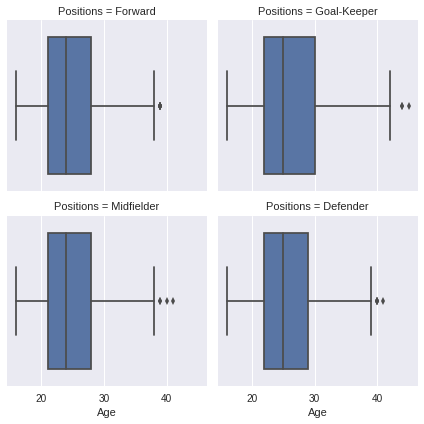

In [80]:
plot_1 = sns.FacetGrid(new, col = "Positions", col_wrap=2,size=3)
plot_1.map(sns.boxplot, 'Age')

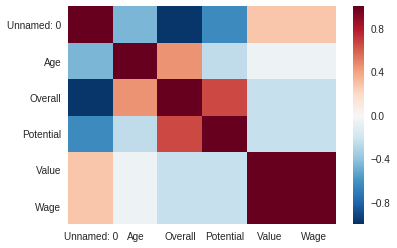

In [81]:
a=new.corr()
sns.heatmap(a)

#my_plot2 = sns.FacetGrid(gk_st, row = "Position")
#my_plot2.map(sns.boxplot, 'Wage')

In [83]:
new.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Club Logo', 'Value', 'Wage', 'Position', 'Positions'],
      dtype='object')

In [0]:
features=new[['Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Club Logo', 'Wage', 'Position', 'Positions']]
unknown=new[['Value']]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, unknown, test_size=0.33)